<a href="https://colab.research.google.com/github/ActnCreate/Project1/blob/main/Project_2_HR_Analytics_Job_Change_of_Data_Scientists.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source of data : 
https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

## 1) 데이터 선정 이유 및 문제 정의
데이터 선정 이유: 
* 현재 관심사와 관련된 데이터
* 데이터 이해 및 접근이 쉽고 도출한 결론을 다방면에 활용 가능할 것으로 예상.   
* 문제 접근 방식 : 분류   
* 주어진 데이터를 바탕으로 데이터 직군으로의 실질적인 이직 의사가 있는지 여부를 예측.

In [1]:
# 데이터 불러오기 

import pandas as pd
import numpy as np

train =  pd.read_csv('/content/aug_train.csv')
X_test =  pd.read_csv('/content/aug_test.csv')
y_test = np.load('/content/jobchange_test_target_values.npy')

In [3]:
# 데이터 훑기
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

## 2) 가설 및 평가지표, 베이스라인 선택  
* Target : 'Target' column, 데이터 직군으로 이직 의사가 실제로 있는지 확인.       
* 베이스라인 모델: 분류 문제이기 때문에 타깃의 최빈값을 베이스라인으로 설정.  
* 평가지표: Imbalanced data이기 때문에 AUC score을 사용.

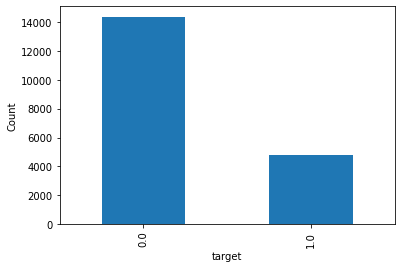

In [2]:
# Imbalanced target data
import matplotlib.pyplot as plt
  
balance = train.target.value_counts()  

balance.plot.bar()
plt.ylabel('Count')
plt.xlabel('target')
plt.xticks(rotation=90)
plt.show();

In [25]:
# target 설정
target = train.target

# 베이스라인 모델
major = target.mode()[0]
pred = [major] * len(target)

#기준모델 정확도
from sklearn.metrics import roc_curve, roc_auc_score

auc_score0 = roc_auc_score(target, pred)
print('Baseline: ', major, '\nBaseline AUC score: ', auc_score0)

Baseline:  0.0 
Baseline AUC score:  0.5


## 3) EDA와 데이터 전처리

### EDA  


In [ ]:
# !pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
from pandas_profiling import ProfileReport

profile = ProfileReport(train, title="Pandas Profiling Report")
profile.to_file("your_report.html")

Gender

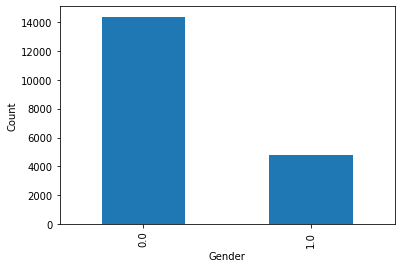

In [25]:
gender_balance = train.gender.value_counts()  

balance.plot.bar()
plt.ylabel('Count')
plt.xlabel('Gender')
plt.xticks(rotation=90)
plt.show();

Relevent_experience

In [ ]:
relevent_experience

### 전처리
* 'enrollee_id' 컬럼 제거 : Unique values
* 'city' 컬럼 제거 : High Cardinality, unable to group.
* 결측치 : 이후 Pipeline에서 Imputer로 결측치 제거.

In [3]:
# Drop 'enrollee_id' and 'city' 
train = train.drop(['enrollee_id', 'city'], axis = 1)
X_test = X_test.drop(['enrollee_id', 'city'], axis = 1)

* Data Leakage가 발생하지 않음.
* Decision Tree 모델을 사용하면 데이터를 정규화 하지 않아도 되어서 전처리 과정이 줄어들어 유용함. 또한 결과물을 이해하기 쉬움. 
* 하지만 데이터의 작은 변동에도 모델이 크게 영향을 받을 수 있고 다른 알고리즘보다 계산 시간이 길다는 한계가 있음.



In [4]:
# 훈련 데이터를 훈련 데이터와 검증 데이터 나누기
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train.drop('target', axis = 1), target, stratify = target, random_state = 42)

## 4) 모델링


In [ ]:
# Libararies
# !pip install category_encoders
# !pip install fancyimpute

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#### Model 1 : Decision Tree Classifier

In [74]:
from category_encoders import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

pipe1 = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=7, random_state=2)
)

pipe1.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['gender', 'relevent_experience',
                                     'enrolled_university', 'education_level',
                                     'major_discipline', 'experience',
                                     'company_size', 'company_type',
                                     'last_new_job'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 Simple...
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=7,
                            

In [32]:
from sklearn.metrics import roc_auc_score

y_pred1 = pipe1.predict(X_val)
auc_score1 = roc_auc_score(y_val, y_pred1)
print('Baseline AUC score: ', auc_score0, '\nModel1 AUC score: ', auc_score1)

Baseline AUC score:  0.5 
Model1 AUC score:  0.7414994885439432


### Model 2 : Random Forest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

pipe2 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(max_depth = 10, min_samples_leaf = 6, n_estimators=100, n_jobs=-1, random_state=10)
)

pipe2.fit(X_train, y_train);

In [48]:
y_pred2 = pipe2.predict(X_val)
auc_score2 = roc_auc_score(y_val, y_pred2)
print('Baseline AUC score: ', auc_score0, '\nModel1 AUC score: ', auc_score1, '\nModel2 AUC score: ', auc_score2)

Baseline AUC score:  0.5 
Model1 AUC score:  0.7414994885439432 
Model2 AUC score:  0.6044083040340746


## 5) 교차검증 및 하이퍼파라미터 튜닝

Model 1: CV

In [57]:
from sklearn.model_selection import RandomizedSearchCV

dists = {'decisiontreeclassifier__max_depth': [5, 10, 20, 30, 50, 100, None]}

clf_dt = RandomizedSearchCV(
    pipe1, 
    param_distributions=dists, 
    n_iter=30, 
    cv=5, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf_dt.fit(X_train, y_train);

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 7 is smaller than n_iter=30. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=-1)]: Done  35 out of  35 | elapsed:   11.9s finished


In [58]:
print('최적 하이퍼파라미터: ', clf_dt.best_params_)

최적 하이퍼파라미터:  {'decisiontreeclassifier__max_depth': 5}


Model 2 : CV

In [49]:
dists = { 
         'randomforestclassifier__max_depth': [5, 10, 15, 20, 30, None],
         'randomforestclassifier__n_estimators' : [100, 500, 1000, 2000, None]
         }
clf = RandomizedSearchCV(
    pipe2, 
    param_distributions=dists, 
    n_iter=30, 
    cv=5, 
    scoring='neg_mean_absolute_error',  
    verbose=1,
    n_jobs=-1
)

clf.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 15.8min finished


In [50]:
print('최적 하이퍼파라미터: ', clf.best_params_)

최적 하이퍼파라미터:  {'randomforestclassifier__n_estimators': 500, 'randomforestclassifier__max_depth': 30}


### Model 1: Hyperparameter tuning

In [59]:
pipe1_2 = make_pipeline(
    OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    DecisionTreeClassifier(max_depth=5, random_state=2)
)

pipe1_2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['gender', 'relevent_experience',
                                     'enrolled_university', 'education_level',
                                     'major_discipline', 'experience',
                                     'company_size', 'company_type',
                                     'last_new_job'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=True, verbose=0)),
                ('simpleimputer',
                 Simple...
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=5,
                            

In [62]:
y_pred1_2 = pipe1_2.predict(X_val)
auc_score1_2 = roc_auc_score(y_val, y_pred1_2)
print('Baseline AUC score: ', auc_score0, '\nModel1 AUC score: ', auc_score1, '\nModel1_2 AUC score: ', auc_score1_2)

Baseline AUC score:  0.5 
Model1 AUC score:  0.7414994885439432 
Model1_2 AUC score:  0.7369322511705729


### Model 2 : Hyperparameter tuning

In [106]:
pipe2_2 = make_pipeline(
    OneHotEncoder(),
    SimpleImputer(), 
    RandomForestClassifier(max_depth = 30, min_samples_leaf = 6, n_estimators=500, n_jobs=-1, random_state=10)
)

pipe2_2.fit(X_train, y_train);

In [107]:
y_pred2_2 = pipe2_2.predict(X_val)
auc_score2_2 = roc_auc_score(y_val, y_pred2_2)
print('Baseline AUC score: ', auc_score0, '\nModel2 AUC score: ', auc_score2, '\nModel2_2 AUC score: ', auc_score2_2)

Baseline AUC score:  0.5 
Model2 AUC score:  0.6044083040340746 
Model2_2 AUC score:  0.6765133602756086


## 5) 머신러닝 모델 해석